# How are bonds priced ?

## Theoretical bon pricing model

$P = \sum_{t=1}^{n}\frac{C}{(1+r)^t} + \frac{F}{(1+r)^n}$

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:

# Bond parameters
face_value = 1  # face value of the bond
coupon_rate = 0.03  # 3% coupon rate
years_to_maturity = 10  # 10 years
payments_per_year = 1  # semi-annual payments

# Calculate coupon payment
def coupon_payment(coupon_rate, face_value, payments_per_year):
    return (coupon_rate * face_value) / payments_per_year

# Function to calculate bond price
def bond_price(ytm, face_value, coupon_payment, years_to_maturity, payments_per_year):
    periods = years_to_maturity * payments_per_year
    discount_factor = 1 + ytm / payments_per_year
    coupon_present_value = sum([coupon_payment / (discount_factor**t) for t in range(1, periods + 1)])
    face_value_present_value = face_value / (discount_factor**periods)
    return coupon_present_value + face_value_present_value

def convexity(ytm, face_value, coupon_payment, years_to_maturity, payments_per_year):
    periods = years_to_maturity * payments_per_year
    discount_factor = 1 + ytm / payments_per_year
    coupon_present_value = sum([coupon_payment / (discount_factor**(t+1)) for t in range(1, periods + 1)])
    face_value_present_value = face_value / (discount_factor**(periods+1))
    return coupon_present_value + face_value_present_value

## Impact of Market Interest Rates on Bond Prices

In [46]:
# Range of market interest rates (YTM) from 0.01 to 0.25
market_rates = np.linspace(0.0, 0.10, 100)

# Calculate bond prices for each market rate.
# Here, we vary the time to maturiy to see the impact of maturity on the relationship between interest rates and bond prices.
bond_prices_1ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 1, payments_per_year) for ytm in market_rates]
bond_prices_3ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 3, payments_per_year) for ytm in market_rates]
bond_prices_5ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 5, payments_per_year) for ytm in market_rates]
bond_prices_10ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 10, payments_per_year) for ytm in market_rates]
bond_prices_30ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 30, payments_per_year) for ytm in market_rates]
bond_prices_50ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 50, payments_per_year) for ytm in market_rates]
bond_prices_AT_70ytm_1_5_cr = [bond_price(ytm, face_value, coupon_payment(0.015, face_value, 1), 70, payments_per_year) for ytm in market_rates]
bond_prices_AT_30ytm_0_75_cr = [bond_price(ytm, face_value, coupon_payment(0.0075, face_value, 1), 30, payments_per_year) for ytm in market_rates]
bond_prices_FR_52ytm_0_75_cr = [bond_price(ytm, face_value, coupon_payment(0.0075, face_value, 1), 52, payments_per_year) for ytm in market_rates]
bond_prices_ES_50ytm_3_45_cr = [bond_price(ytm, face_value, coupon_payment(0.0345, face_value, 1), 50, payments_per_year) for ytm in market_rates]
bond_prices_100ytm = [bond_price(ytm, face_value, coupon_payment(coupon_rate, face_value, 1), 100, payments_per_year) for ytm in market_rates]

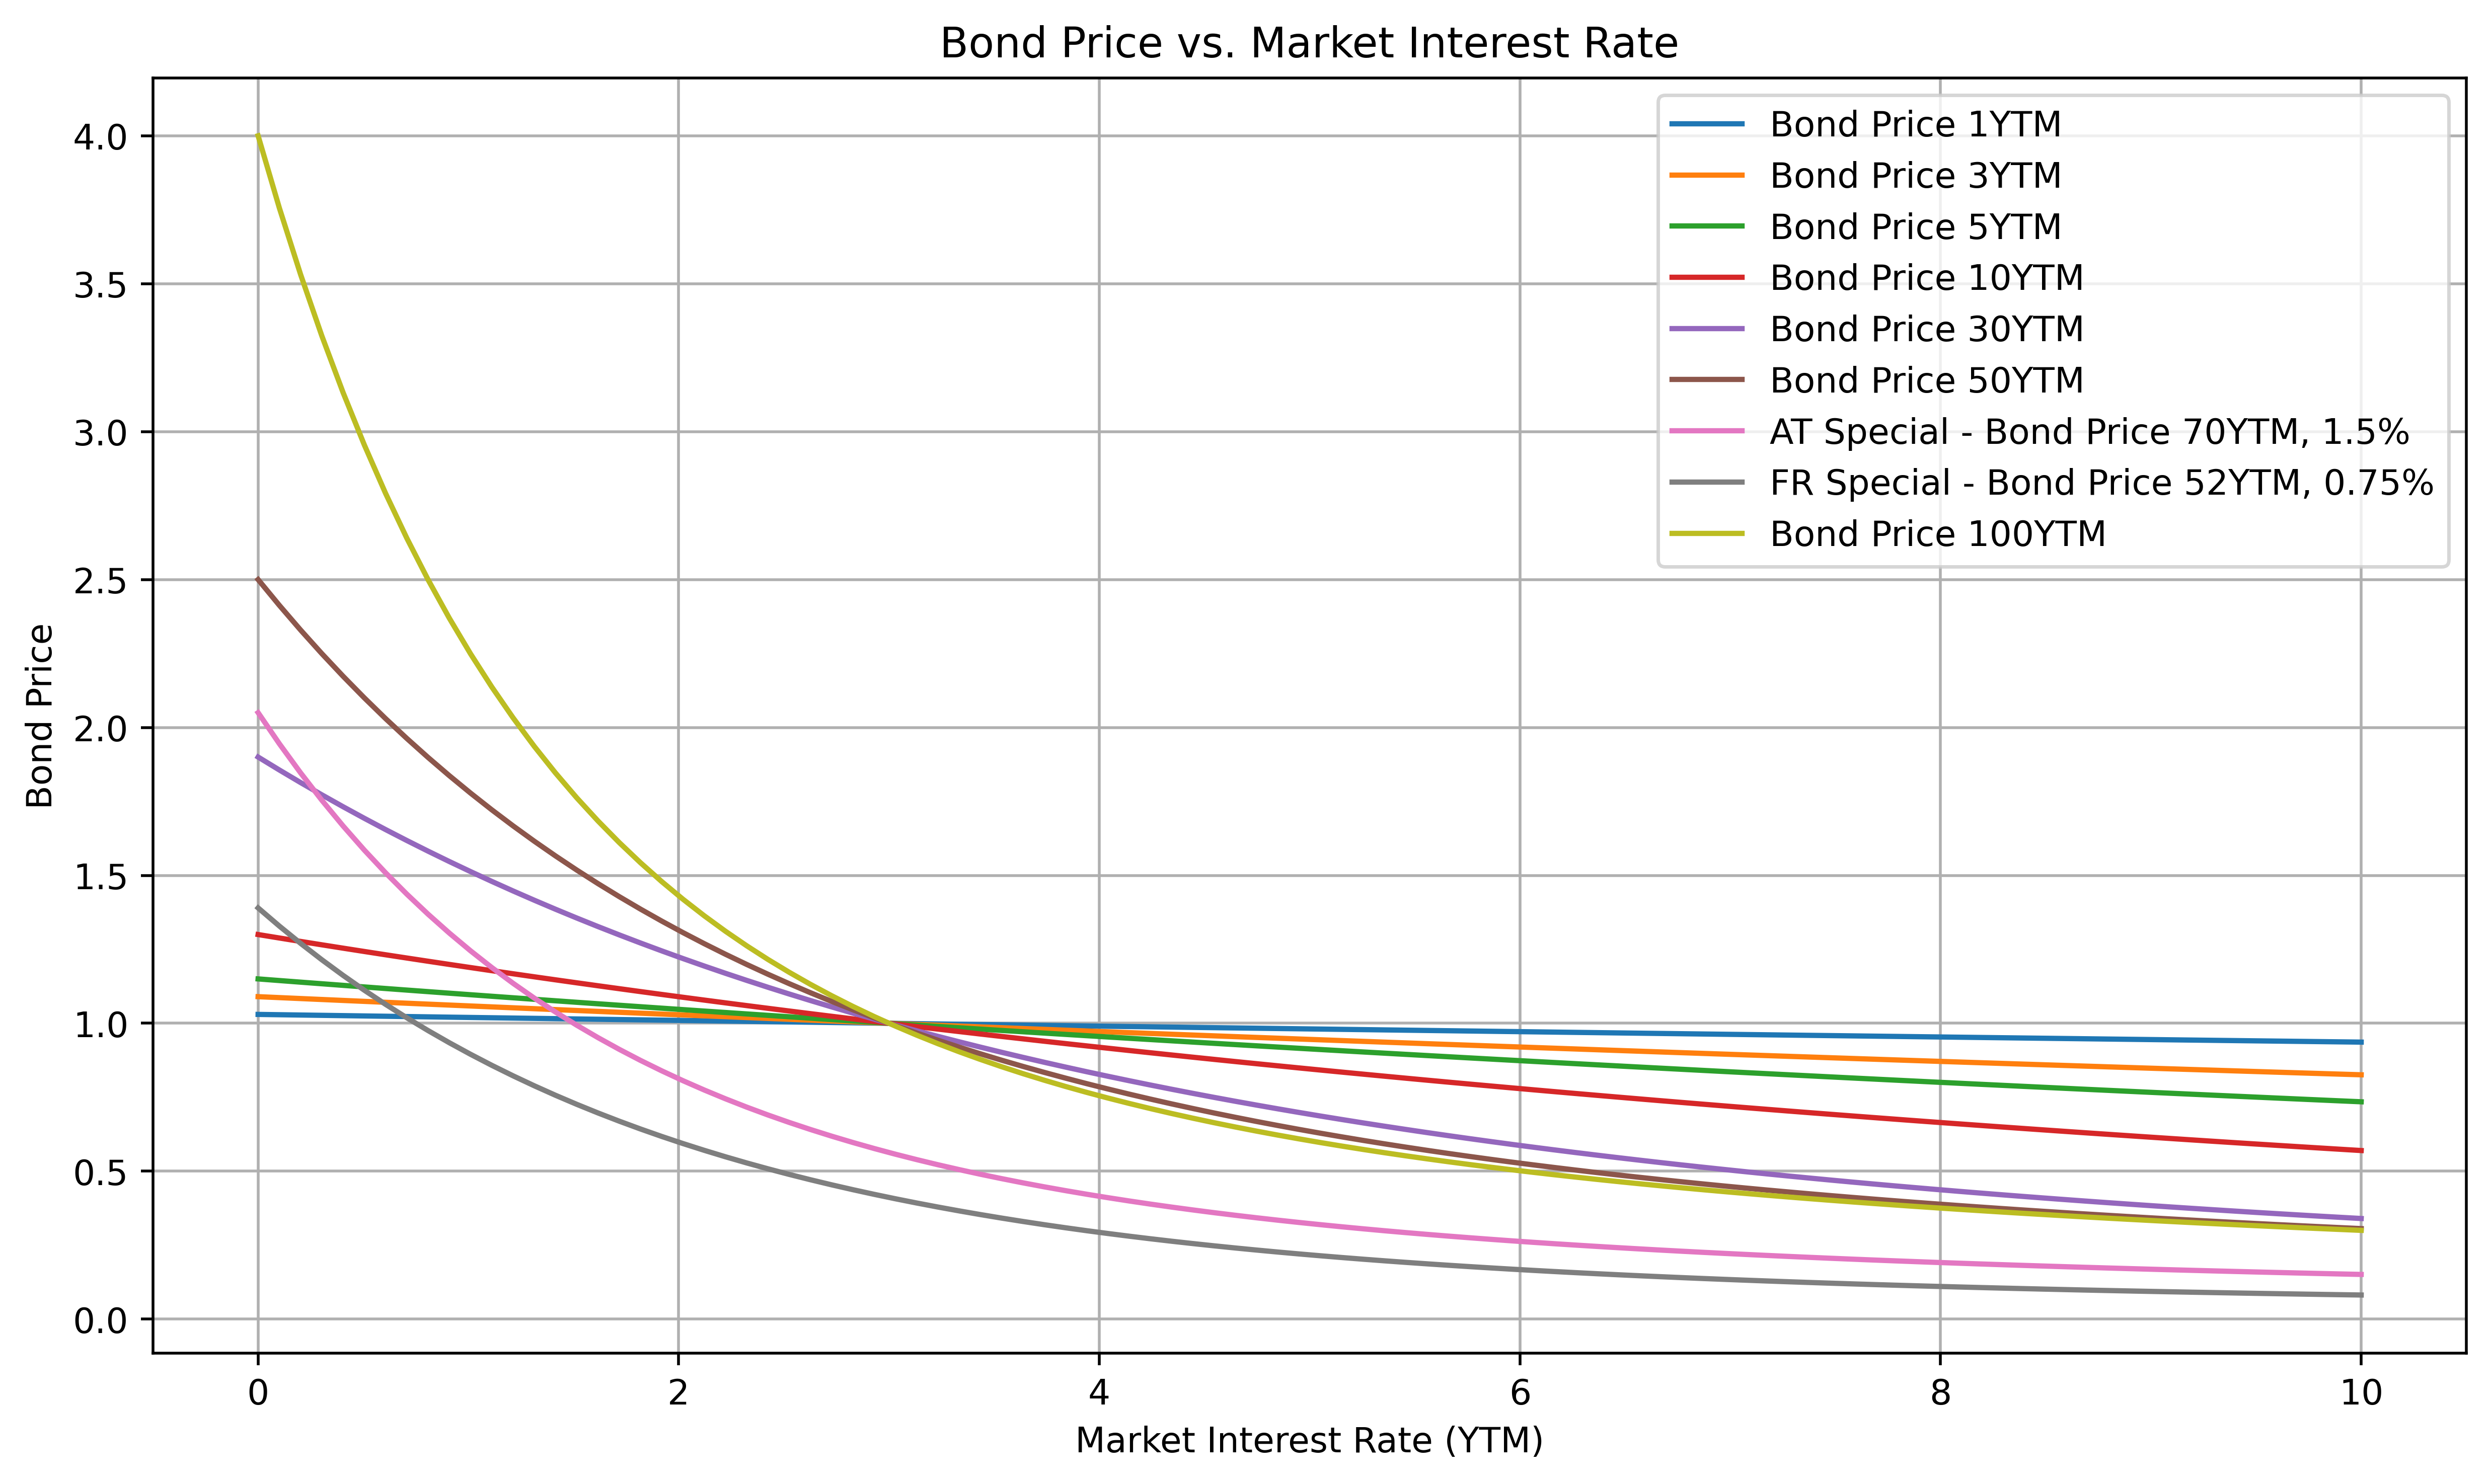

In [47]:
# Plot bond price against market interest rate
plt.figure(figsize=(10, 6), dpi=500)
plt.plot(market_rates * 100.0, bond_prices_1ytm, label="Bond Price 1YTM")
plt.plot(market_rates * 100.0, bond_prices_3ytm, label="Bond Price 3YTM")
plt.plot(market_rates * 100.0, bond_prices_5ytm, label="Bond Price 5YTM")
plt.plot(market_rates * 100.0, bond_prices_10ytm, label="Bond Price 10YTM")
plt.plot(market_rates * 100.0, bond_prices_30ytm, label="Bond Price 30YTM")
plt.plot(market_rates * 100.0, bond_prices_50ytm, label="Bond Price 50YTM")
plt.plot(market_rates * 100.0, bond_prices_AT_70ytm_1_5_cr, label="AT Special - Bond Price 70YTM, 1.5%")
# plt.plot(market_rates * 100.0, bond_prices_AT_30ytm_0_75_cr, label="AT Special - Bond Price 30YTM, 0.75%")
plt.plot(market_rates * 100.0, bond_prices_FR_52ytm_0_75_cr, label="FR Special - Bond Price 52YTM, 0.75%")
# plt.plot(market_rates * 100.0, bond_prices_ES_50ytm_3_45_cr, label="ES Special - Bond Price 50YTM, 3.45%")
plt.plot(market_rates * 100.0, bond_prices_100ytm, label="Bond Price 100YTM")
plt.title("Bond Price vs. Market Interest Rate")
plt.xlabel("Market Interest Rate (YTM)")
plt.ylabel("Bond Price")
plt.grid(True)
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Save the plot in both formats before showing
plt.savefig('plots/bonds_price_vs_ytm.png', format='png')
plt.savefig('plots/bonds_price_vs_ytm.pdf', format='pdf')

# Display the plot
plt.show()

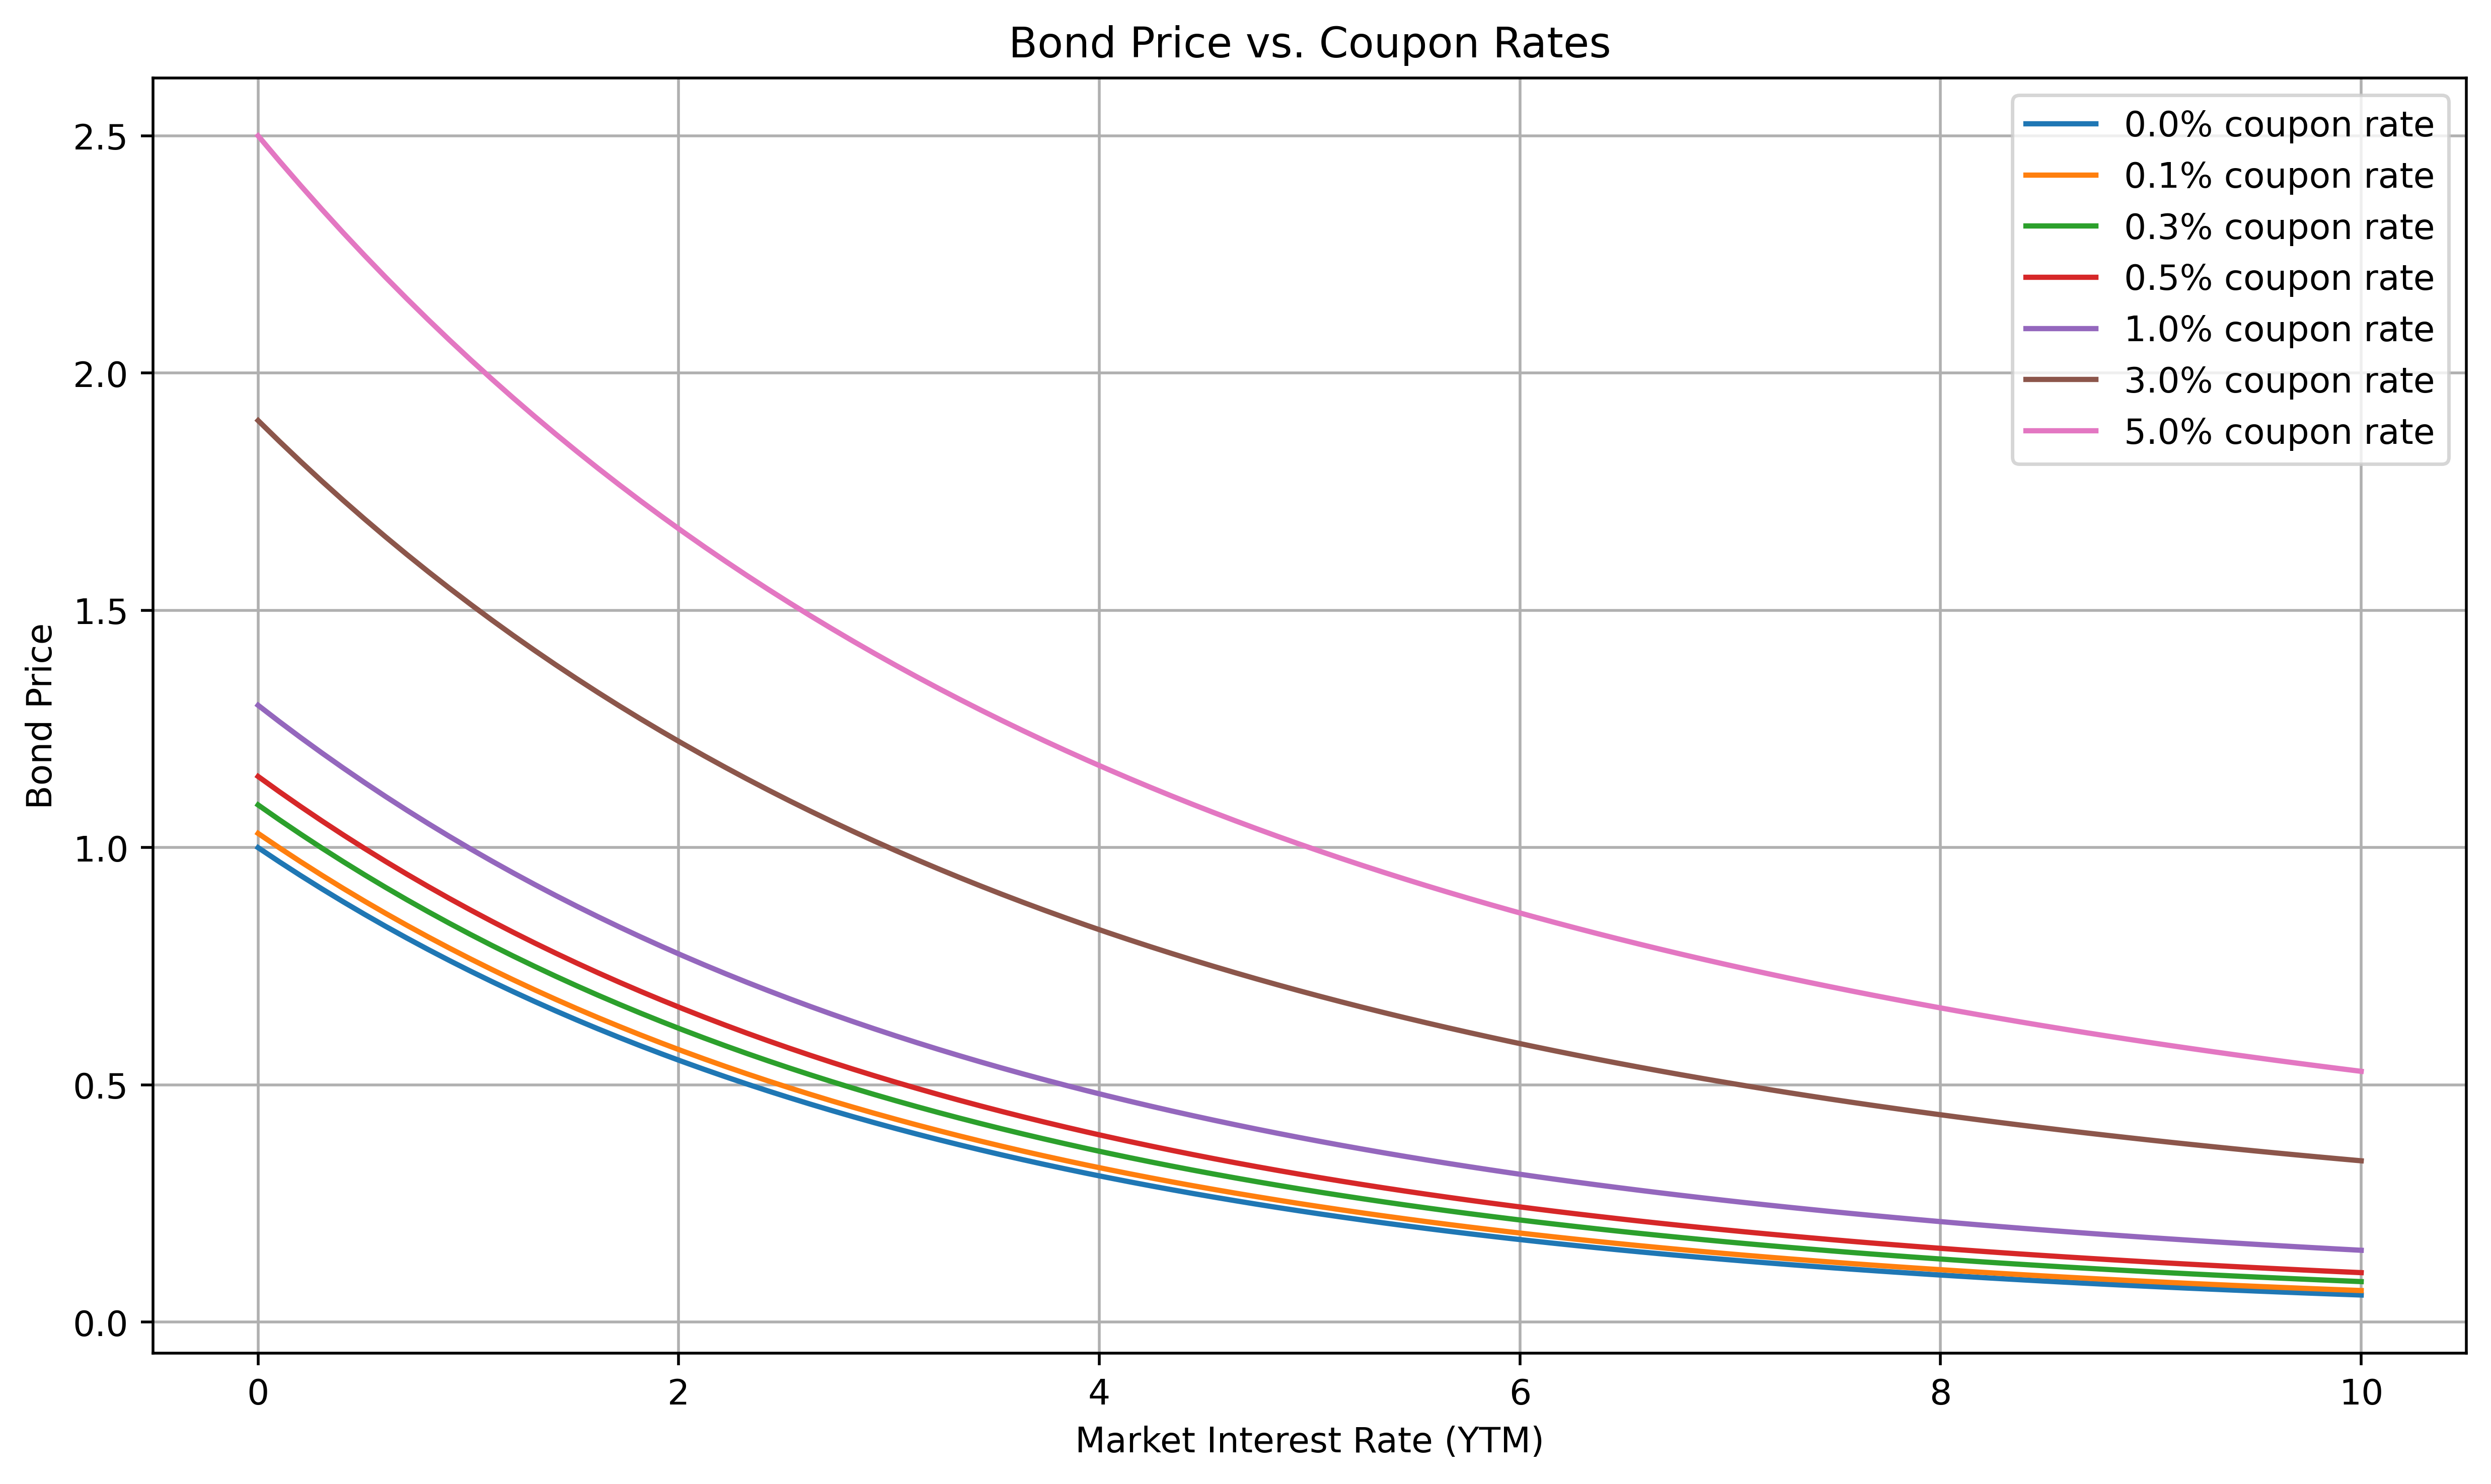

In [49]:
# Plot bond price against market interest rate
plt.figure(figsize=(10, 6), dpi=500)
plt.plot(market_rates * 100.0, bond_prices_0_0, label="0.0% coupon rate")
plt.plot(market_rates * 100.0, bond_prices_0_1, label="0.1% coupon rate")
plt.plot(market_rates * 100.0, bond_prices_0_3, label="0.3% coupon rate")
plt.plot(market_rates * 100.0, bond_prices_0_5, label="0.5% coupon rate")
plt.plot(market_rates * 100.0, bond_prices_1_0, label="1.0% coupon rate")
plt.plot(market_rates * 100.0, bond_prices_3_0, label="3.0% coupon rate")
plt.plot(market_rates * 100.0, bond_prices_5_0, label="5.0% coupon rate")
plt.title("Bond Price vs. Coupon Rates")
plt.xlabel("Market Interest Rate (YTM)")
plt.ylabel("Bond Price")
plt.grid(True)
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Save the plot in both formats before showing
plt.savefig('plots/bonds_price_vs_coupon_rate.png', format='png')
plt.savefig('plots/bonds_price_vs_coupon_rate.pdf', format='pdf')

# Display the plot
plt.show()

## Observing Time Decay in bond prices

In [50]:
# Range of market interest rates (YTM) from 0.01 to 0.25
time_to_maturity = np.linspace(0, 30, 31, dtype=int)

bond_prices_30ytm = [bond_price(0.03, face_value, coupon_payment(coupon_rate, face_value, 1), ttm, payments_per_year) for ttm in time_to_maturity]

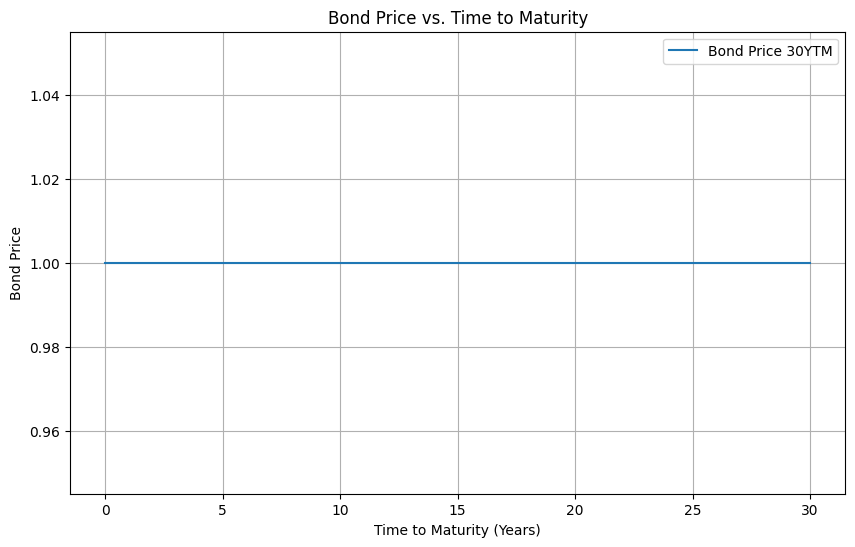

In [51]:
# Plot bond price against market interest rate
plt.figure(figsize=(10, 6))
plt.plot(time_to_maturity, bond_prices_30ytm, label="Bond Price 30YTM")
plt.title("Bond Price vs. Time to Maturity")
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Bond Price")
plt.grid(True)
plt.legend()
plt.show()
